# Load Dataset

In [2]:
import pandas as pd

# Define file path:
file_path = "KPMG_VI_New_raw_data_update_final.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

xls.sheet_names # Display sheet names


['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']

In [3]:
# Load each sheet into DataFrame
df_transactions = pd.read_excel(xls, sheet_name="Transactions")
df_customers = pd.read_excel(xls, sheet_name="CustomerDemographic")
df_new_customers = pd.read_excel(xls, sheet_name="NewCustomerList")
df_addresses = pd.read_excel(xls, sheet_name="CustomerAddress")

# Display first 5 rows of each dataset
print("Transactions Data: ")
print(df_transactions.head(), "\n")

print("-"*70)
print("Customer Demographics Data: ")
print(df_customers.head(), "\n")

print("-"*70)

print("New Customer List Data: ")
print(df_new_customers.head(), "\n")

print("-"*70)

print("Customer Address Data: ")
print(df_addresses.head(), "\n")

Transactions Data: 
   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49   

# Data Cleaning and Preprocessing

In [4]:
# Function to check missing values and data types
def Check_Missing_values(df, name):
    print(f"\nDataset: {name}")
    print(df.info()) #check data types
    print("\nMissing Values: ")
    print(df.isnull().sum()) #Count missing values
    print("="*50)

# Check each dataset
Check_Missing_values(df_transactions, "Transactions")
Check_Missing_values(df_customers, "Customer Demographics")
Check_Missing_values(df_new_customers, "New Customer List")
Check_Missing_values(df_addresses, " Customer Address")


Dataset: Transactions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_f

In [5]:
# Fill missing value in Cusomer Demographics
df_customers["job_industry_category"].fillna("Unknown", inplace=True)
df_customers["wealth_segment"].fillna(df_customers["wealth_segment"].mode()[0], inplace=True)

# Drop rows with many missing values
df_customers.dropna(subset=['DOB'], inplace=True)

# Fill missing values in Transactions
df_transactions.fillna(0, inplace=True) # Assuming values mean no transaction

print(df_customers.isnull().sum())
print(df_transactions.isnull().sum())

customer_id                              0
name                                     0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
age                                      1
job_title                              497
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int64
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64


C:\Users\sachi\AppData\Local\Temp\ipykernel_19176\2983762599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_customers["job_industry_category"].fillna("Unknown", inplace=True)
C:\Users\sachi\AppData\Local\Temp\ipykernel_19176\2983762599.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [6]:
# Remove dulicates from transcations
df_transactions.drop_duplicates(inplace=True)

#Remove duplicates from Customers
df_customers.drop_duplicates(inplace=True)

#check if duplicates still exist
print(f"Customer Duplicates: {df_customers.duplicated().sum()}")
print(f"Transaction Duplicates: {df_transactions.duplicated().sum()}")

Customer Duplicates: 0
Transaction Duplicates: 0


# Exploratory Data Analysis

In [16]:
# Understanding Customer Spending Behavior

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 

# total revenue
total_revenue = df_transactions["list_price"].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

# Average Order Value
average_order_value = df_transactions["list_price"].mean()
print(f"Average Order Value: ${average_order_value:,.2f}")

# No of unique customers
total_customers = df_transactions["customer_id"].nunique()
print(f"Total Unique Customers: {total_customers}")

Total Revenue: $22,156,588.98
Average Order Value: $1,107.83
Total Unique Customers: 3494


In [18]:
# Who are the top customers?

C:\Users\sachi\AppData\Local\Temp\ipykernel_19176\1473831508.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y= top_customers.values, palette="viridis")


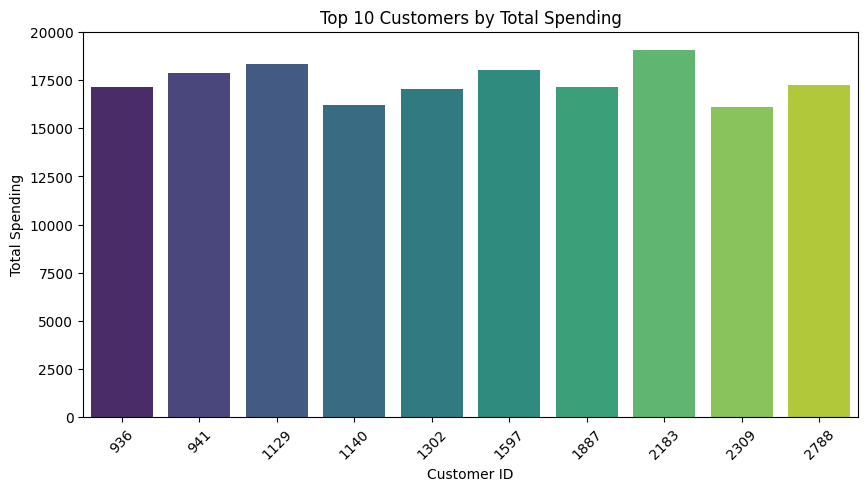

In [21]:
# Group by customer and sum the purchase amounts
top_customers = df_transactions.groupby("customer_id")["list_price"].sum().sort_values(ascending=False).head(10)

# Plot top 10 Customers
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index, y= top_customers.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.title("Top 10 Customers by Total Spending")
plt.show()

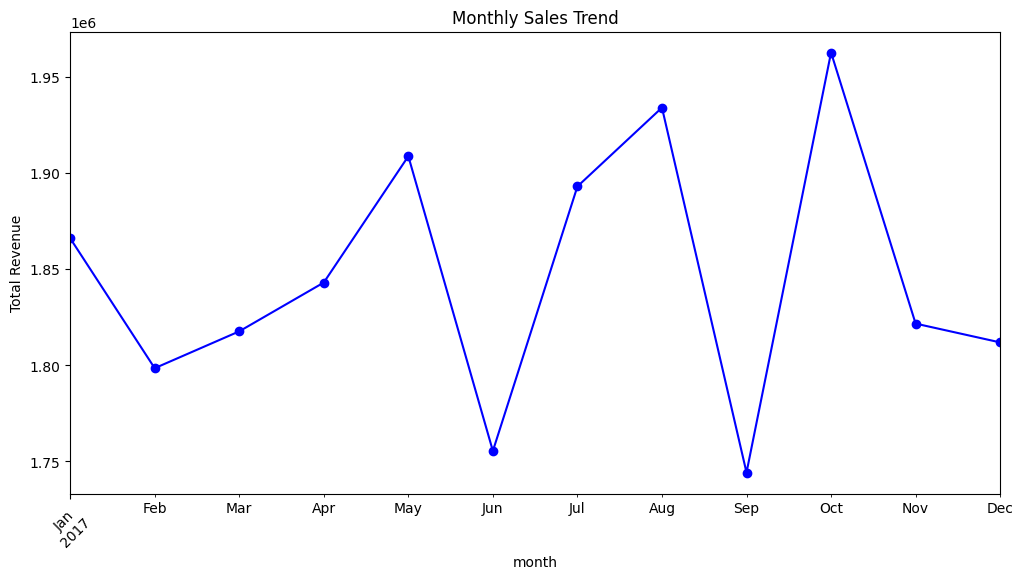

In [23]:
# What Are the Sales Trends Over Time?

# Extract month and year
df_transactions["YearMonth"] = df_transactions["transaction_date"].dt.to_period("M")

# Group by month
monthly_sales = df_transactions.groupby("YearMonth")["list_price"].sum()

#Plot sals trends
plt.figure(figsize=(12,6))
monthly_sales.plot(marker="o", color="blue")
plt.xlabel("month")
plt.ylabel("Total Revenue")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()

C:\Users\sachi\AppData\Local\Temp\ipykernel_19176\1998636355.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = df_merged.groupby("Age Group")["list_price"].sum()
C:\Users\sachi\AppData\Local\Temp\ipykernel_19176\1998636355.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_spending.index, y=age_group_spending.values, palette="coolwarm")


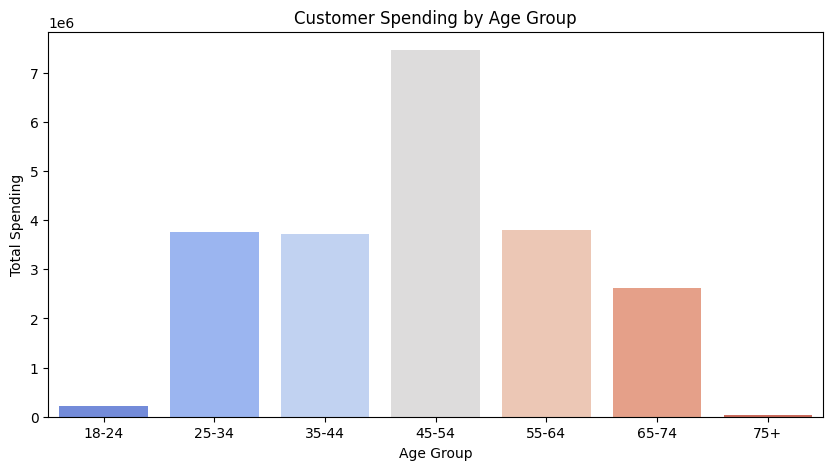

In [30]:
# Customer Spending by demographics

# create age bins 
bins = [18, 25, 35, 45, 55, 65, 75, 100]
labels = ["18-24", "25-34","35-44", "45-54", "55-64", "65-74", "75+"]
df_customers['DOB'] = pd.to_datetime(df_customers['DOB'])
df_customers["Age"] = (pd.Timestamp.today().year - df_customers["DOB"].dt.year)
df_customers["Age Group"] = pd.cut(df_customers["Age"], bins=bins, labels=labels, right=False)

# Merge customer demographics with transactions
df_merged = df_transactions.merge(df_customers, on="customer_id", how='left')

# Group by age group and sum spending
age_group_spending = df_merged.groupby("Age Group")["list_price"].sum()

# Plot spending by age group and spending
plt.figure(figsize=(10,5))
sns.barplot(x=age_group_spending.index, y=age_group_spending.values, palette="coolwarm")
plt.xlabel("Age Group")
plt.ylabel("Total Spending")
plt.title("Customer Spending by Age Group")
plt.show()

# Customer Segementation using RFM Analysis

In [ ]:
''' 
RFM is Data-driven customer segmentation technique based on:
- Recency(R): How recently a customer made a purchase.
- Frequency(F): How often a customer makes purchases.
- Monetary value(M): How much money a customer has spent.

This helps in:
- Identifing loyal customer
- Finding customer at risk of churn
- Targeting marketing campaigns effectively
'''

In [ ]:
# Preparing the data

import datetime

reference_date = df_transactions["transaction_date"].max() # latest transcation date inn the dataset

# RFM Calulation
rfm = df_transactions.groupby("customer_id").agg({
    "transaction_date": lambda x: (reference_date - x.max()).days, # Recency
    "transaction_id": "count", # Frequency
    "list_price" : "sum" #Monetary Value
})

# Rename columns
rfm.columns = ["Recency", "Frequency", "Monetary"]

# Display top 5 customer
print(rfm.head())

             Recency  Frequency  Monetary
customer_id                              
1                  7         11   9084.45
2                128          3   4149.07
3                102          8   9888.23
4                195          2   1047.72
5                 16          6   5903.20


In [32]:
# Assiging RFM Scores

rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[5,4,3,2,1])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[5,4,3,2,1])

# combine scores into a single RFM score
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str) 

# Display
print(rfm.head())

             Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
customer_id                                                                
1                  7         11   9084.45       5       1       1       511
2                128          3   4149.07       1       5       4       154
3                102          8   9888.23       1       2       1       121
4                195          2   1047.72       1       5       5       155
5                 16          6   5903.20       4       3       3       433


In [34]:
# Defining customer segments

def segment_customer(rfm_score):
    if rfm_score in ["555", "554", "545"]:
        return "VIP Customer"
    elif rfm_score in ["544", "543", "435"]:
        return "Loyal Customer"
    elif rfm_score in ["333", "323", "232"]:
        return "Potential Loyalist"
    elif rfm_score in ["221", "212", '211']:
        return "At Risk of Churn"
    else:
        return "Lost Customer"
    
# Apply segmentation
rfm["segment"] = rfm["RFM_Score"].apply(segment_customer)

#Diplay segmented customers
print(rfm["segment"].value_counts())

segment
Lost Customer         3025
At Risk of Churn       141
Potential Loyalist     117
Loyal Customer         111
VIP Customer           100
Name: count, dtype: int64


In [35]:
# Saved cleaned datasets for Power BI

df_transactions.to_csv("transaction_cleaned.csv", index=False)
df_customers.to_csv("customers_cleaned.csv", index=False)
rfm.to_csv("rfm_segmentation.csv", index=True)